# Atuador Solenoide
Professor Paulo Victor <br>
Fonte: Kluever, Craig A., **Sistemas Dinâmicos: Modelagem, Simulação e Controle**, 1ª Ed., Rio de Janeiro: LTC, 2018. 

## Introdução
Um atuador solenoide é um dispositivo eletromecânico que converte energia elétrica (fonte de tensão) em energia mecânica (movimento de translação) mediante o emprego de alguns princípios básicos de corrente-magnetismo que representam a operação de um motor CC.<br>
Um atuador solenoide consiste em uma bobina de fio com um núcleo de ferro (a armadura ou pistão) que se move para dentro e para fora do centro da bobina. <br>

![](solenoide2.png)

![](solenoide1.png)

A indutância da bobina do atuador solenoide é uma função não linear da posição da armadura. A indutância (e consequentemente, o fluxo magnético) diminui conforme a armadura se afasta da bobina e aumenta quando a armadura se aproxima do centro da bobina. <br>
Um método aceitável para modelar a indutância da bobina é empregar a expressão não linear:
$$L(x) = \dfrac{c}{d-x} = \dfrac{L_0}{1-x/d}$$
As constantes $c$ e $d$ dependem do material da bobina do solenoide. A indutância quando $x=0$ é:
$$L_0 = \dfrac{\mu A N^2}{l}$$
Onde $N$ é o número de voltas da bobina, $A$ é a área do entreferro, $l$ é o comprimento da bobina, e $\mu$ é a permeabilidade magnética do ar e do núcleo de ferro. A indutância mínima $L_0$ da bobina é uma constante conhecida dados os valores de $A$, $N$, $l$ e $\mu$.

Assim como no motor CC, o modelo matemático completo do atuador solenoide será desenvolvido pela aplicações das leis de Kirchhoff no circuito da armadura e as leis de Newton ao elemento de massa única. 

![](solenoide3.png)

Obtenção da tensão no indutor do solenoide em função da derivada no tempo do enlace de fluxo magnético
$$ \lambda = e_L$$
Onde: 
$$ \lambda = \dfrac{dL}{dt} I + L \dfrac{dI}{dt} $$
Usando a regra da cadeia:
$$ \lambda = \dfrac{dL}{dx} \dfrac{dx}{dt}I + L \dfrac{dI}{dt} $$
De forma mais compacta:
$$ \lambda = L_x \dot{x}I + L(x) \dot{I}$$

Podemos escrever $L_x$ como:
$$L_x = \dfrac{dL}{dx} = \dfrac{L_0}{d(1-x/d)^2}$$.
Utilizando a equação de Kirchhoff:
$$L(x) + RI = e_{ent}(t) - L_x \dot{x} I $$

![](solenoide4.png)

**Equação de movimento**
$$F_{em} - kx - b \dot{x} = m \ddot{x} $$
Reorganizando:
$$m \ddot{x} + b \dot{x} + k x = F_{em} $$

De modo a completar o modelo é necessária uma expressão para a força eletromagnética $F_{em}$, que é gerada pela energia armazenada na bobina do solenoide. A partir do princípio de trabalho e energia, sabe-se que o produto da força eletromagnética e de um deslocamento incremental $dx$ é igual a uma variação incrementatal na energia $d \xi$
$$ F_{em} dx = d \xi $$
Resolvendo para a força eletromagnética:
$$F_{em} = \dfrac{d \xi}{dx} $$
A energia armazenada em um indutor é devida à indutância e à corrente:
$$\xi = \dfrac{1}{2}LI^2 $$
Portanto, tomando a derivada da energia em relação ao deslocamento $x$ e susbstituindo na equação da $F_{em}$, tem-se uma expressão para a força eletromagnética:
$$F_{em} = \dfrac{1}{2} \dfrac{dL}{dx} I^{2} $$

Pode-se ver que a força eletromagnética é uma função não linear da corrente e do deslocamento, pois a derivada $L_x$ é uma função não linear de $x$. <br>
O modelo matemático completo do atuador solenoide consiste em uma equação para o sistema elétrico e uma para o sistema mecânico juntamente com a equação usada para definir a força eletromagnética. 
$$L(x) \dot{I} + R I = e_{ent}(t) - L_{x}\dot{x} I $$
$$m \ddot{x} + b \dot{x} + k x = \dfrac{1}{2} L_{x} I^{2} $$

In [1]:
import sympy as sy

In [2]:
x,v,I,eent,m,b,k,R,d,mu,A,N,l = sy.symbols('x v I eent m b k R,d,mu,A,N,l')

In [3]:
L0 = (mu*A*N**2)/(l)
L0

A*N**2*mu/l

In [4]:
L = L0/(1-x/d)
L

A*N**2*mu/(l*(1 - x/d))

### Equações:

$$\dot{x} = v$$

In [5]:
xd = v

$$\dot{I} = (e_{ent}(t) - RI - L_{x} v I)/L(x) $$ 

In [6]:
Id = (eent - R*I - L.diff(x)*v*I)/L
Id

l*(1 - x/d)*(-A*I*N**2*mu*v/(d*l*(1 - x/d)**2) - I*R + eent)/(A*N**2*mu)

$$\dot{v} = (-bv - kx + \dfrac{1}{2}L_{x}I^2)/m$$

In [7]:
vd = (-b*v - k*x + (L.diff(x)*I**2)/2)/m
vd

(A*I**2*N**2*mu/(2*d*l*(1 - x/d)**2) - b*v - k*x)/m

### Parâmetros

In [8]:
dic1 = {m:1,b:0.02,k:50,R:1,d:10**8,mu:1*10**(-8),A:0.03,N:100,l:1}

In [9]:
from numpy import linspace

In [10]:
n = 5000 # número de pontos para a simulação
t0 = 0 # tempo inicial de simulação
tf = 25 # tempo final de simulação

In [11]:
t_n = linspace(t0,tf,n)

In [12]:
def eent_n(t):
    return 45

Condições Iniciais:

In [13]:
x0 = 0.5
v0 = 0
I0 = 0
X0=[x0,v0,I0]

Criação de função para receber as 3 EDOs de primeira ordem:

In [14]:
def Modelo(X,T):
    dic1.update({x:X[0],v:X[1],I:X[2]})
    dic1.update({eent:eent_n(T)})
    xdn = X[1]
    vdn = vd.subs(dic1)
    Idn = Id.subs(dic1)
    return [xdn,vdn,Idn]

### Integração Numérica

In [15]:
from scipy.integrate import odeint

In [16]:
X = odeint(Modelo,X0,t_n)

In [17]:
import matplotlib.pyplot as plt

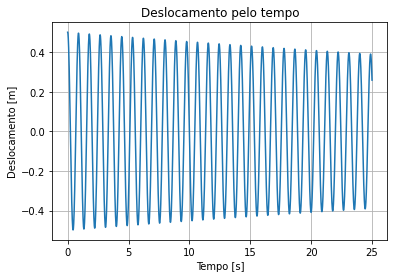

In [18]:
plt.figure()
plt.plot(t_n,X[:,0])
plt.xlabel('Tempo [s]')
plt.ylabel('Deslocamento [m]')
plt.title('Deslocamento pelo tempo')
plt.grid(True)

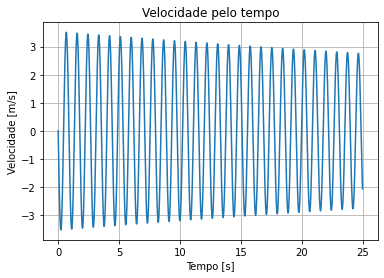

In [19]:
plt.figure()
plt.plot(t_n,X[:,1])
plt.xlabel('Tempo [s]')
plt.ylabel('Velocidade [m/s]')
plt.title('Velocidade pelo tempo')
plt.grid(True)

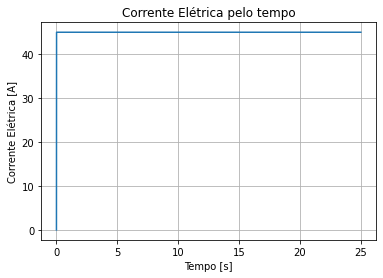

In [20]:
plt.figure()
plt.plot(t_n,X[:,2])
plt.xlabel('Tempo [s]')
plt.ylabel('Corrente Elétrica [A]')
plt.title('Corrente Elétrica pelo tempo')
plt.grid(True)